In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


# GAN

In [ ]:
import numpy as np
import keras
import keras.backend as K
from keras.layers import Input, Dense, Activation, LeakyReLU, BatchNormalization
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

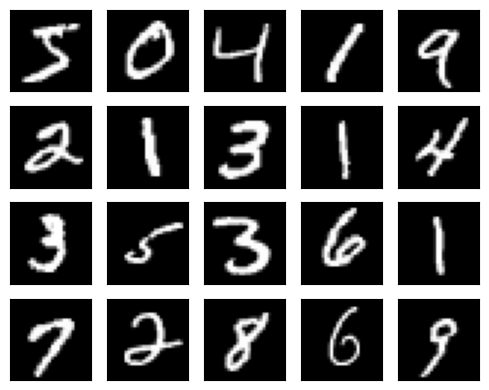

In [ ]:
plt.figure(figsize=(5, 4))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

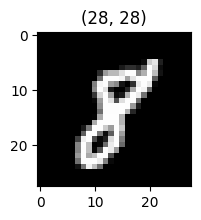

In [ ]:
sample = X_train[17]

plt.figure(figsize=(3, 2))
plt.title(sample.shape)
plt.imshow(sample, cmap='gray')
plt.show()

In [ ]:
X_train.min(), X_train.max()

(np.uint8(0), np.uint8(255))

In [ ]:
def make_latent_samples(n_samples, sample_size):
    #return np.random.uniform(-1, 1, size=(n_samples, sample_size))
    return np.random.normal(loc=0, scale=1, size=(n_samples, sample_size))

In [ ]:
make_latent_samples(1, 100) # Genera una muestra.

array([[-0.81172819, -0.83720967,  0.0830195 ,  0.23722253,  0.97043927,
        -0.0893582 ,  1.5287507 , -0.48133361, -0.4093862 , -1.24277187,
         0.62149034, -0.52310385, -0.98195903,  1.37831921, -1.07312787,
        -0.53886104,  1.29797834, -0.77900033, -0.5883523 , -0.56696313,
        -0.2884343 , -0.96335519,  1.29148774, -1.8296988 , -1.32911862,
         2.52953459,  0.9502923 , -1.38907207,  0.88572549,  0.7439926 ,
        -0.66228202,  0.38423292, -1.05604896,  0.03535072, -0.33828756,
         0.8816436 , -0.08734184,  0.96702377, -1.11087145,  1.10396843,
        -0.19285394, -1.10681236, -1.36103597, -0.71307587, -0.81675126,
         0.29115709, -0.76045099,  0.7076873 ,  0.94721984,  0.29301145,
         0.96027687,  0.44618749, -0.25247245, -0.23356908,  0.60856822,
        -1.09150329,  0.6102776 ,  0.45422216, -1.25210381,  0.55435383,
         0.56749193, -1.46819279,  0.04847316,  0.2709078 , -0.05988398,
         0.17224037, -0.10400673, -0.93438324, -1.3

In [ ]:
generator = Sequential([Dense(128, input_shape=(100,)), LeakyReLU(alpha=0.01), Dense(784), Activation('tanh')], name='generator')
generator.summary()

Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       101,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 784)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 114,064 (445.56 KB)

 Trainable params: 114,064 (445.56 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
discriminator = Sequential([Dense(128, input_shape=(784,)), LeakyReLU(alpha=0.01), Dense(1), Activation('sigmoid')], name='discriminator')
discriminator.summary()

Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,609 (393.00 KB)

 Trainable params: 100,609 (393.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Mantener los mismos pesos compartidos entre el generador y el discriminador.
gan = Sequential([generator, discriminator])
gan.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ generator (Sequential)          │ (None, 784)            │       114,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ discriminator (Sequential)      │ (None, 1)              │       100,609 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 214,673 (838.57 KB)

 Trainable params: 214,673 (838.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def make_trainable(model, trainable):
    for layer in model.layers:
        layer.trainable = trainable

In [ ]:
make_trainable(discriminator, False)
discriminator.summary()

Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,609 (393.00 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 100,609 (393.00 KB)

In [ ]:
make_trainable(discriminator, True)
discriminator.summary()

Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,609 (393.00 KB)

 Trainable params: 100,609 (393.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def make_simple_GAN(sample_size, g_hidden_size, d_hidden_size, leaky_alpha, g_learning_rate, d_learning_rate):
    K.clear_session()

    generator = Sequential([Dense(g_hidden_size, input_shape=(sample_size,)), LeakyReLU(alpha=leaky_alpha), Dense(784), Activation('tanh')], name='generator')

    discriminator = Sequential([Dense(d_hidden_size, input_shape=(784,)), LeakyReLU(alpha=leaky_alpha), Dense(1), Activation('sigmoid')], name='discriminator')

    gan = Sequential([generator, discriminator])

    discriminator.compile(optimizer=Adam(learning_rate=d_learning_rate), loss='binary_crossentropy')
    gan.compile(optimizer=Adam(learning_rate=g_learning_rate), loss='binary_crossentropy')

    return gan, generator, discriminator

In [ ]:
def preprocess(x):
    x = x.reshape(-1, 784) # 784=28*28
    x = np.float64(x)
    x = (x / 255 - 0.5) * 2
    x = np.clip(x, -1, 1)
    return x

In [ ]:
X_train_real = preprocess(X_train)
X_test_real  = preprocess(X_test)

In [ ]:
X_train_real.shape,X_train_real[0].shape,np.max(X_train_real[0]),np.min(X_train_real[0])

((60000, 784), (784,), np.float64(1.0), np.float64(-1.0))

In [ ]:
def deprocess(x):
    x = (x / 2 + 1) * 255
    x = np.clip(x, 0, 255)
    x = np.uint8(x)
    x = x.reshape(28, 28)
    return x

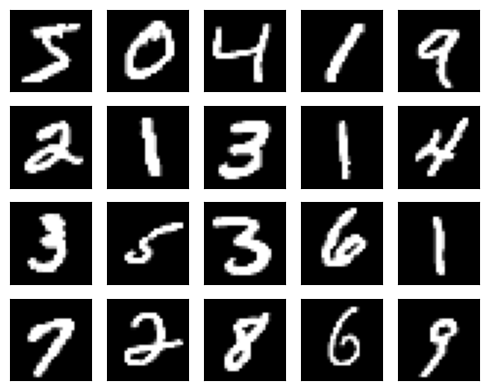

In [ ]:
plt.figure(figsize=(5, 4))
for i in range(20):
    img = deprocess(X_train_real[i])
    plt.subplot(4, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [ ]:
def make_labels(size):
    return np.ones([size, 1]), np.zeros([size, 1])

In [ ]:
y_real_10, y_fake_10 = make_labels(10)

y_real_10, y_fake_10

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]))

In [ ]:
# hyperparameters
sample_size     = 80     # latent sample size (i.e., 100 random numbers)
#sample_size     = 50
g_hidden_size   = 64
d_hidden_size   = 64
#leaky_alpha     = 0.01
leaky_alpha     = 0.3
#g_learning_rate = 0.0001  # learning rate for the generator
g_learning_rate = 0.0001  # learning rate for the generator
d_learning_rate = 0.001   # learning rate for the discriminator
#epochs          = 10
epochs          = 50
batch_size      = 256      # train batch size
eval_size       = 16      # evaluate size
smooth          = 0.3

# labels for the batch size and the test size
y_train_real, y_train_fake = make_labels(batch_size)
y_eval_real,  y_eval_fake  = make_labels(eval_size)

# create a GAN, a generator and a discriminator
gan, generator, discriminator = make_simple_GAN(sample_size, g_hidden_size, d_hidden_size, leaky_alpha, g_learning_rate, d_learning_rate)

losses = []
for e in range(epochs):
    for i in range(len(X_train_real)//batch_size):
        # real MNIST digit images
        X_batch_real = X_train_real[i*batch_size:(i+1)*batch_size]

        # latent samples and the generated digit images
        latent_samples = make_latent_samples(batch_size, sample_size)
        X_batch_fake = generator.predict_on_batch(latent_samples)

        # train the discriminator to detect real and fake images
        make_trainable(discriminator, True)
        discriminator.train_on_batch(X_batch_real, y_train_real * (1 - smooth))
        discriminator.train_on_batch(X_batch_fake, y_train_fake)

        # train the generator via GAN
        make_trainable(discriminator, False)
        gan.train_on_batch(latent_samples, y_train_real)

    # evaluate
    X_eval_real = X_test_real[np.random.choice(len(X_test_real), eval_size, replace=False)]

    latent_samples = make_latent_samples(eval_size, sample_size)
    X_eval_fake = generator.predict_on_batch(latent_samples)

    d_loss  = discriminator.test_on_batch(X_eval_real, y_eval_real)
    d_loss += discriminator.test_on_batch(X_eval_fake, y_eval_fake)
    g_loss  = gan.test_on_batch(latent_samples, y_eval_real) # we want the fake to be realistic!

    losses.append((d_loss, g_loss))

    print("Epoch: {:>3}/{} Discriminator Loss: {:>6.4f} Generator Loss: {:>6.4f}".format(e+1, epochs, d_loss, g_loss))

Epoch:   1/50 Discriminator Loss: 0.7763 Generator Loss: 2.5107
Epoch:   2/50 Discriminator Loss: 0.7120 Generator Loss: 3.2916
Epoch:   3/50 Discriminator Loss: 0.6862 Generator Loss: 3.7317
Epoch:   4/50 Discriminator Loss: 0.6744 Generator Loss: 3.9458
Epoch:   5/50 Discriminator Loss: 0.6744 Generator Loss: 4.0458
Epoch:   6/50 Discriminator Loss: 0.6736 Generator Loss: 4.0476
Epoch:   7/50 Discriminator Loss: 0.6737 Generator Loss: 4.0494
Epoch:   8/50 Discriminator Loss: 0.6732 Generator Loss: 4.0446
Epoch:   9/50 Discriminator Loss: 0.6779 Generator Loss: 4.0083
Epoch:  10/50 Discriminator Loss: 0.6824 Generator Loss: 3.9520
Epoch:  11/50 Discriminator Loss: 0.6865 Generator Loss: 3.9074
Epoch:  12/50 Discriminator Loss: 0.6883 Generator Loss: 3.8821
Epoch:  13/50 Discriminator Loss: 0.6896 Generator Loss: 3.8670
Epoch:  14/50 Discriminator Loss: 0.6914 Generator Loss: 3.8535
Epoch:  15/50 Discriminator Loss: 0.6946 Generator Loss: 3.8330
Epoch:  16/50 Discriminator Loss: 0.6974

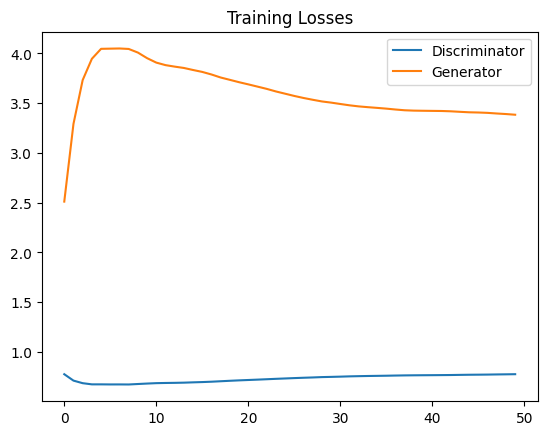

In [ ]:
run1_losses = np.array(losses)
fig, ax = plt.subplots()
plt.plot(run1_losses.T[0], label='Discriminator')
plt.plot(run1_losses.T[1], label='Generator')
plt.title("Training Losses")
plt.legend()
plt.savefig('training_losses_run.png') # Save the plot as a PNG file
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


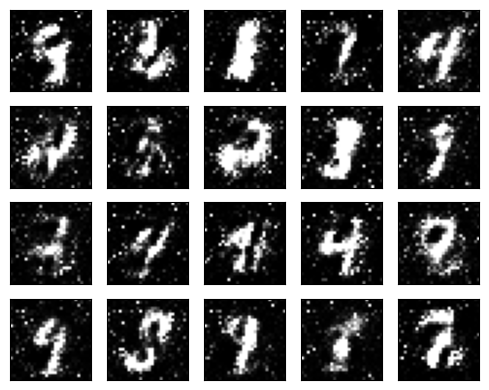

In [ ]:
latent_samples = make_latent_samples(20, sample_size)
generated_digits = generator.predict(latent_samples)

plt.figure(figsize=(5, 4))
for i in range(20):
    img = deprocess(generated_digits[i])
    plt.subplot(4, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.savefig('run.png') # Save the plot as a PNG file
plt.tight_layout()
plt.show()

### ANÁLISIS Y RESULTADOS:
Este análisis examina tres diferentes configuraciones de hiperparámetros para el entrenamiento de una Red Generativa Antagónica (GAN) aplicada a la generación de dígitos MNIST. Este ejercicio evalúa la estabilidad del proceso de entrenamiento mediante el análisis de las curvas de pérdida, así como la calidad visual de las imágenes generadas, con el objetivo de identificar la configuración óptima y comprender los factores que influyen en el rendimiento del modelo.


* **Comparación:** los tres experimentos presentan variaciones significativas en sus hiperparámetros, destacando el Run 1 con valores altos y simétricos de tasas de aprendizaje (0.001) y el menor número de épocas (15), el Run 2 con tasas reducidas pero simétricas (0.0001) y un poco más de épocas (30) y el Run 3 con una configuración asimétrica (0.001 para el discriminador y 0.0001 para el generador) con un mayor número de épocas (50). Además, observamos una reducción en el tamaño de las capas ocultas en el Run 3 (de 128 a 64) y un aumento progresivo tanto en el valor de leaky_alpha (de 0.2 a 0.3) como en el tamaño del lote (de 64 a 256), demostrando un enfoque de optimización progresiva.


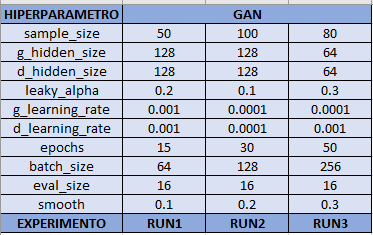

* **Estabilidad**: la evolución de las curvas de pérdida nos muestra distintos comportamientos en cada experimento, donde el primero muestra una mejora gradual pero limitada por su corta duración, el segundo presenta una rápida estabilización que sugiere un estancamiento  muy rápido en el tiempo, mientras que el tercero exhibe la dinámica más favorable con un descenso constante en la pérdida del generador junto a un discriminador moderadamente estable, indicando un proceso de aprendizaje equilibrado y progresivo que permite al generador mejorar continuamente sin ser dominado por el discriminador.

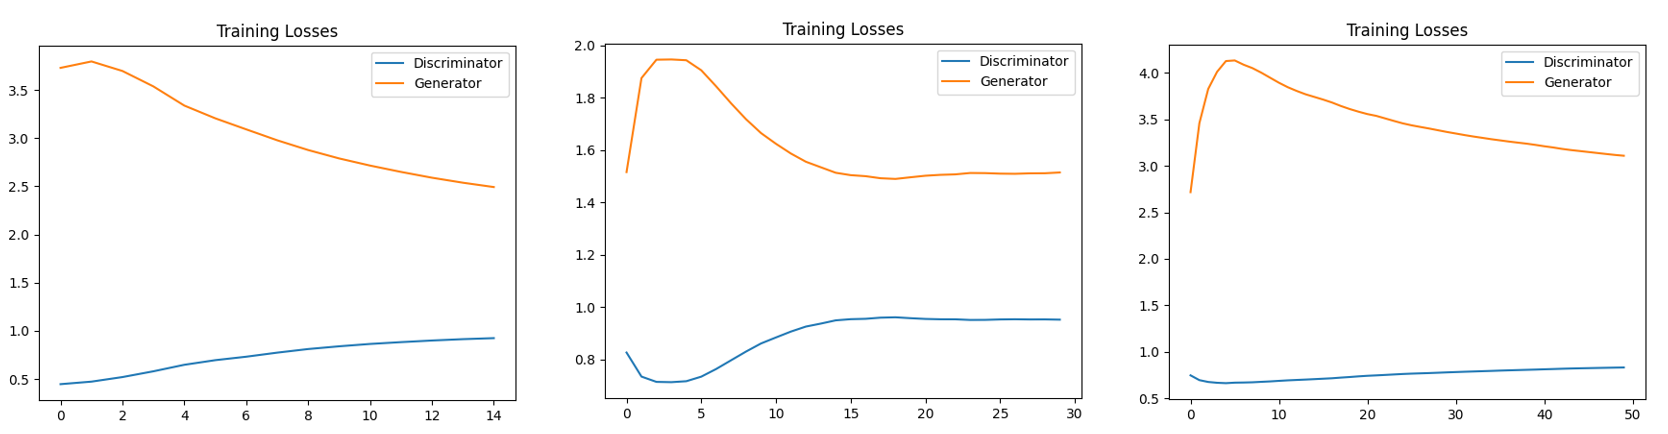


* **Calidad de las imágenes generadas:** los digitos generados evidencian una marcada diferencia en calidad entre los tres experimentos, donde el primero produce dígitos reconocibles pero con ruido significativo, el segundo muestra un claro caso de colapso por lo que muestra mágenes amorfas, con demasiado ruido y similares entre sí, mientras que el tercero logra generar dígitos claramente identificables con mejor definición de contornos y características, así como una diversidad satisfactoria que incluye múltiples tipos de dígitos.

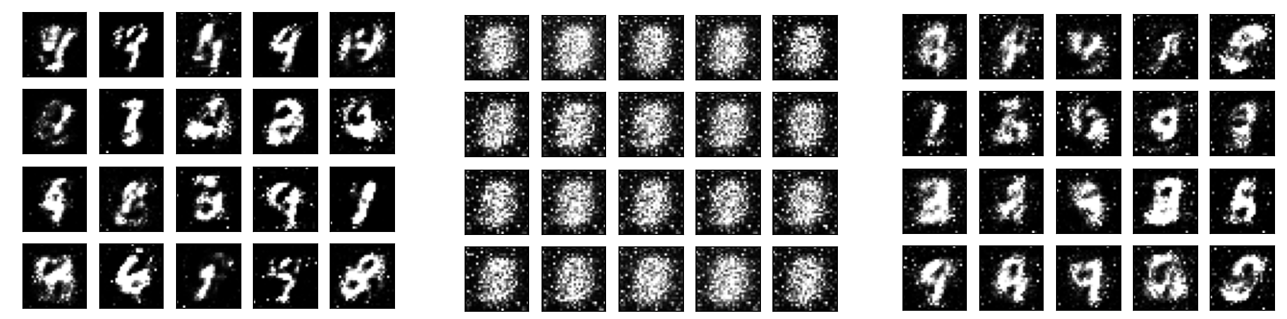


* **Dificultades presentadas:** estos experimentos mostraron desafíos comunes en el entrenamiento de GANs, principalmente el colapso de modo observado en el segundo experimento donde el generador converge a producir un rango limitado de salidas, además del desafío fundamental de mantener un equilibrio adecuado entre generador y discriminador, evidenciado por las distintas dinámicas de pérdida, y la alta sensibilidad del modelo a pequeños cambios en los hiperparámetros, lo que muestra la complejidad asociada a la optimización de estas arquitecturas.

* **Efectos de los cambios:** las variaciones en los hiperparámetros demuestran impactos significativos, donde la asimetría en las tasas de aprendizaje del Run 3 (discriminador mayor que generador) favorece un entrenamiento más estable al prevenir que cualquiera de los componentes domine excesivamente, mientras que el incremento en el valor de leaky_alpha mejora la propagación de gradientes y formación de características, y el aumento progresivo tanto del tamaño de lote como del valor de suavizado contribuyen a una mayor estabilidad y prevención del sobreajuste respectivamente.

* **Conclusiones:** el análisis comparativo indica claramente la superioridad del Run 3, donde la combinación de tasas de aprendizaje asimétricas, un valor mayor de leaky_alpha, y redes de menor tamaño con entrenamiento más prolongado resultó en el mejor equilibrio entre estabilidad y calidad de imágenes generadas. Este éxito demuestra que el rendimiento óptimo de una GAN no depende simplemente de redes más grandes o entrenamientos más extensos, sino de un balance cuidadoso de componentes que permita al generador aprender efectivamente mientras recibe retroalimentación útil de un buen discriminador.

* **Recomendaciones:** para mejorar aún más el rendimiento de futuros experimentos con GANs, se podra intentar mantener la asimetría en las tasas de aprendizaje con el discriminador ligeramente más fuerte que el generador, explorar valores de leaky_alpha en el rango de 0.3 a 0.4 para potenciar la formación de características, implementar técnicas de estabilización adicionales como normalización por lotes o penalización de gradientes, desarrollar un enfoque de incremento gradual en la complejidad arquitectónica una vez lograda la estabilidad básica, y considerar la transición hacia arquitecturas más sofisticadas WGAN para elevar la calidad de las imágenes generadas.

# DCGAN

In [ ]:
import numpy as np
from scipy.io import loadmat
import keras
import keras.backend as K
from keras.layers import Dense, Activation, LeakyReLU, BatchNormalization
from keras.layers import Conv2D, Conv2DTranspose, Reshape, Flatten
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Activation, LeakyReLU, BatchNormalization, Dropout # Import Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

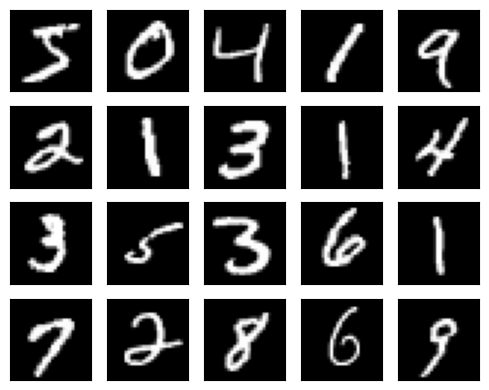

In [ ]:
plt.figure(figsize=(5, 4))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [ ]:
def preprocess(x):
    x = x.reshape(-1, 28, 28, 1) # 28,28,1
    x = np.float64(x)
    x = (x / 255 - 0.5) * 2
    x = np.clip(x, -1, 1)
    return x

def deprocess(x):
    x = (x / 2 + 1) * 255
    x = np.clip(x, 0, 255)
    x = np.uint8(x)
    x = x.reshape(28, 28)
    return x

In [ ]:
X_train_real = preprocess(X_train)
X_test_real  = preprocess(X_test)

In [ ]:
def make_generator(input_size, leaky_alpha):
    return Sequential([
        Dense(7 * 7 * 64, input_shape=(input_size,)), #aumento de neuronas en la capa densa 64 en lugar de 16
        Reshape(target_shape=(7, 7, 64)),
        BatchNormalization(),
        LeakyReLU(alpha=leaky_alpha),

        # Aumento del filtro en ConvTranspose de 64 en lugar de 32
        Conv2DTranspose(64, kernel_size=5, strides=2, padding='same'),
        BatchNormalization(),
        LeakyReLU(alpha=leaky_alpha),

        # 28x28x1
        Conv2DTranspose(1, kernel_size=5, strides=2, padding='same'),
        Activation('tanh')
    ])

In [ ]:
def make_discriminator(leaky_alpha):
    return Sequential([
        # se aumento el flitro de 32 por 64, se estableció el kernel inicializador 'he_uniform'
        Conv2D(64, kernel_size=5, strides=2, padding='same', input_shape=(28,28,1),
               kernel_initializer='he_uniform'),
        LeakyReLU(alpha=leaky_alpha),
        Dropout(0.3), #agregamos el dropout

        # se aumento el flitro de 16 por 128, se estableció el kernel inicializador 'he_uniform'
        Conv2D(128, kernel_size=5, strides=2, padding='same',
               kernel_initializer='he_uniform'),
        LeakyReLU(alpha=leaky_alpha),
        Dropout(0.3), #agregamos el dropout

        # se aumento el flitro de 784 por 1024, se estableció el kernel inicializador 'he_uniform' y se eliminó el batch_normalization
        Flatten(),
        Dense(1024, kernel_initializer='he_uniform'),
        LeakyReLU(alpha=leaky_alpha),
        Dropout(0.3), #agregamos el dropout

        Dense(1, activation='sigmoid')  # or use no activation with from_logits=True
    ])

In [ ]:
# beta_1 is the exponential decay rate for the 1st moment estimates in Adam optimizer
def make_DCGAN(sample_size, g_learning_rate, g_beta_1, d_learning_rate, d_beta_1, leaky_alpha):
    # clear first
    K.clear_session()

    # generator
    generator = make_generator(sample_size, leaky_alpha)

    # discriminator
    discriminator = make_discriminator(leaky_alpha)
    discriminator.compile(optimizer=Adam(learning_rate=d_learning_rate, beta_1=d_beta_1), loss='binary_crossentropy')

    # GAN
    gan = Sequential([generator, discriminator])
    gan.compile(optimizer=Adam(learning_rate=g_learning_rate, beta_1=g_beta_1), loss='binary_crossentropy')

    return gan, generator, discriminator

In [ ]:
def make_latent_samples(n_samples, sample_size):
    #return np.random.uniform(-1, 1, size=(n_samples, sample_size))
    return np.random.normal(loc=0, scale=1, size=(n_samples, sample_size))

In [ ]:
def make_trainable(model, trainable):
    for layer in model.layers:
        layer.trainable = trainable

In [ ]:
def make_labels(size):
    return np.ones([size, 1]), np.zeros([size, 1])

In [ ]:
def show_results(losses):
    labels = ['Classifier', 'Discriminator', 'Generator']
    losses = np.array(losses)

    fig, ax = plt.subplots()
    plt.plot(losses.T[0], label='Discriminator')
    plt.plot(losses.T[1], label='Generator')
    plt.title("Training Losses")
    plt.legend()
    plt.show()

In [ ]:
def show_images(generated_images):
    n_images = len(generated_images)
    rows = 4
    cols = n_images//rows

    plt.figure(figsize=(cols, rows))
    for i in range(n_images):
        img = deprocess(generated_images[i])
        plt.subplot(rows, cols, i+1)
        plt.imshow(img, cmap='gray')
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()

In [ ]:
def train(
    g_learning_rate,   # learning rate for the generator
    g_beta_1,          # the exponential decay rate for the 1st moment estimates in Adam optimizer
    d_learning_rate,   # learning rate for the discriminator
    d_beta_1,          # the exponential decay rate for the 1st moment estimates in Adam optimizer
    leaky_alpha,
    smooth=0.3,        # label smoothing
    sample_size=75,   # latent sample size (i.e. 100 random numbers)
    epochs=100,
    batch_size=256,    # train batch size
    eval_size=16,      # evaluate size
    show_details=True):

    # labels for the batch size and the test size
    y_train_real, y_train_fake = make_labels(batch_size)
    y_eval_real,  y_eval_fake  = make_labels(eval_size)

    # create a GAN, a generator and a discriminator
    gan, generator, discriminator = make_DCGAN(sample_size, g_learning_rate, g_beta_1, d_learning_rate, d_beta_1, leaky_alpha)

    losses = []
    for e in range(epochs):
        for i in range(len(X_train_real)//batch_size):
            # real MNIST digit images
            X_batch_real = X_train_real[i*batch_size:(i+1)*batch_size]

            # latent samples and the generated digit images
            latent_samples = make_latent_samples(batch_size, sample_size)
            X_batch_fake = generator.predict_on_batch(latent_samples)

            # train the discriminator to detect real and fake images
            make_trainable(discriminator, True)
            discriminator.train_on_batch(X_batch_real, y_train_real * (1 - smooth))
            discriminator.train_on_batch(X_batch_fake, y_train_fake)

            # train the generator via GAN
            make_trainable(discriminator, False)
            gan.train_on_batch(latent_samples, y_train_real)

        # evaluate
        X_eval_real = X_test_real[np.random.choice(len(X_test_real), eval_size, replace=False)]

        latent_samples = make_latent_samples(eval_size, sample_size)
        X_eval_fake = generator.predict_on_batch(latent_samples)

        d_loss  = discriminator.test_on_batch(X_eval_real, y_eval_real)
        d_loss += discriminator.test_on_batch(X_eval_fake, y_eval_fake)
        g_loss  = gan.test_on_batch(latent_samples, y_eval_real) # we want the fake to be realistic!

        losses.append((d_loss, g_loss))

        print("Epoch:{:>3}/{} Discriminator Loss:{:>7.4f} Generator Loss:{:>7.4f}".format(
            e+1, epochs, d_loss, g_loss))

        if show_details and (e+1)%10==0:
            show_images(X_eval_fake)
    if show_details:
        show_results(losses)
    return generator

In [ ]:
train(g_learning_rate=0.0002, g_beta_1=0.1, d_learning_rate=0.0002, d_beta_1=0.1, leaky_alpha=0.5);

Epoch:  1/100 Discriminator Loss: 2.0270 Generator Loss: 1.5429
Epoch:  2/100 Discriminator Loss: 1.7440 Generator Loss: 1.6288
Epoch:  3/100 Discriminator Loss: 1.6289 Generator Loss: 1.5543
Epoch:  4/100 Discriminator Loss: 1.5610 Generator Loss: 1.4843
Epoch:  5/100 Discriminator Loss: 1.5151 Generator Loss: 1.4287
Epoch:  6/100 Discriminator Loss: 1.4820 Generator Loss: 1.3848
Epoch:  7/100 Discriminator Loss: 1.4569 Generator Loss: 1.3521


### ANALISIS Y RESULTADOS
En el caso de este análisis de tres diferentes configuraciones de hiperparámetros con DCGAN (Deep Convolutional Generative Adversarial Network) para la generación de dígitos MNIST nos muestra mejoras y avances muy significativos y claros respecto a las arquitecturas GAN estándar. Estos modelos, que incorporan capas convolucionales especialmente diseñadas para el procesamiento de imágenes, nos muestran que se pueden generar dígitos con definición superior, menor ruido de fondo y mayor diversidad en los estilos de escritura, evidenciando así las ventajas estructurales que las redes convolucionales aportan al proceso generativo.

* **Configuraciones:** la tabla comparativa de hiperparámetros nos muestra diferentes combinaciones entre los tres experimentos, donde el Run 1 implementa una asimetría notable con el generador teniendo una tasa de aprendizaje diez veces mayor que el discriminador (0.002 vs 0.0002), mientras que el Run 2 invierte esta relación dándole mayor fuerza al discriminador (0.002 vs 0.001), y el Run 3 establece un equilibrio con tasas idénticas pero más conservadoras (0.0002), complementado con valores extremos de leaky_alpha (0.5), el batch_size más grande (256) y el entrenamiento más prolongado (100 épocas), mostrando una estrategia de optimización un poco más estructurada. Así mismo podemos observar diferentes tamñaos de muestras a medida que aumenta las épocas.

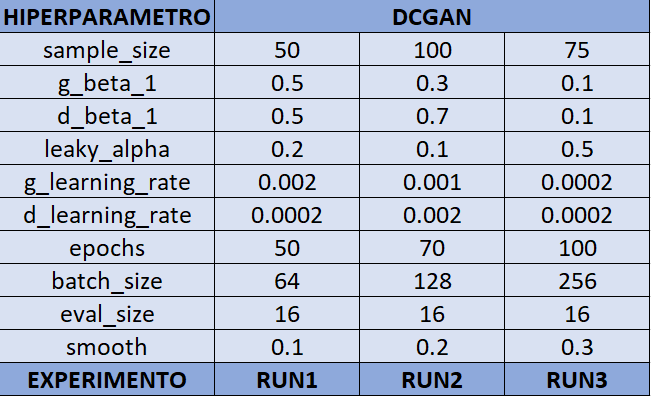


* **Estabilidad:** la evolución de las curvas de pérdida revelan comportamientos característicos en cada experimento, por ejemplo en el Run 1 se observa una convergencia relativamente suave con el generador iniciando alto y descendiendo progresivamente mientras el discriminador mantiene valores estables; en el caso del Run 2, este muestra signos preocupantes de inestabilidad con oscilaciones en la pérdida del generador y un salto abrupto alrededor de la época 45 que sugiere un desequilibrio crítico; finalmente en el Run 3 se presenta la trayectoria más favorable con una rápida convergencia inicial seguida de una estabilización temprana de ambas pérdidas, indicando un balance óptimo entre los componentes del sistema.

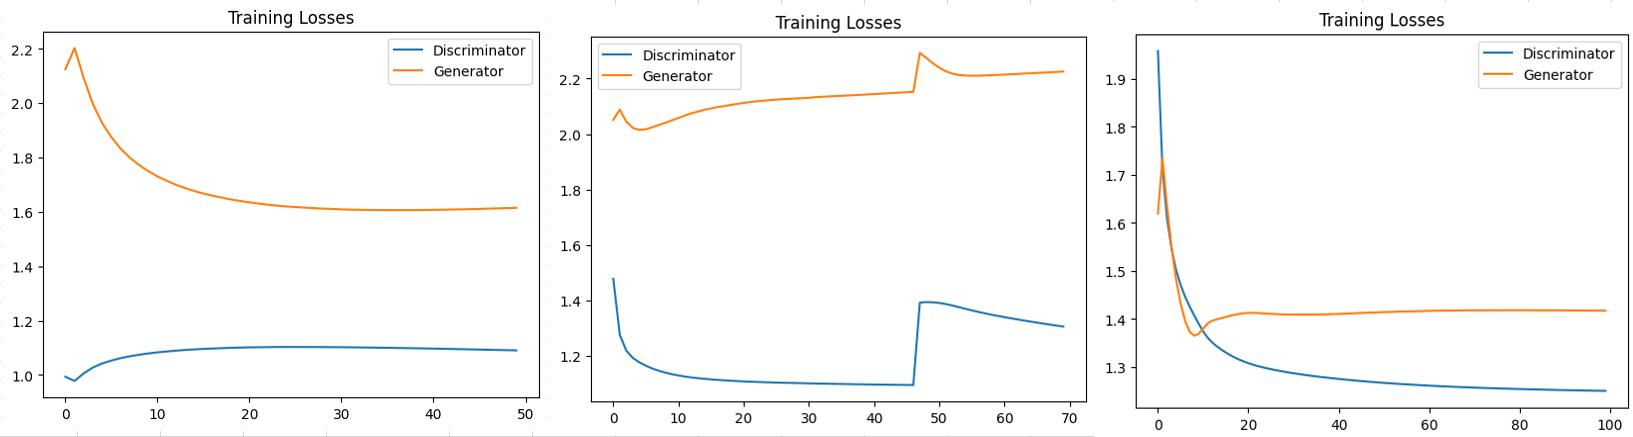

* **Calidad de imágenes generadas:** las imágenes creadas por los tres experimentos DCGAN muestran una calidad notablemente superior a las de las GAN estándar analizadas previamente, con dígitos claramente reconocibles que muestran contornos un poco más nítidos, mínimo ruido de fondo y una excelente variedad de estilos de escritura que abarcan todo el rango de dígitos (0-9), siendo prácticamente indistinguibles de los ejemplos reales del conjunto MNIST, lo que confirma el valor de las arquitecturas convolucionales para la generación de imágenes.

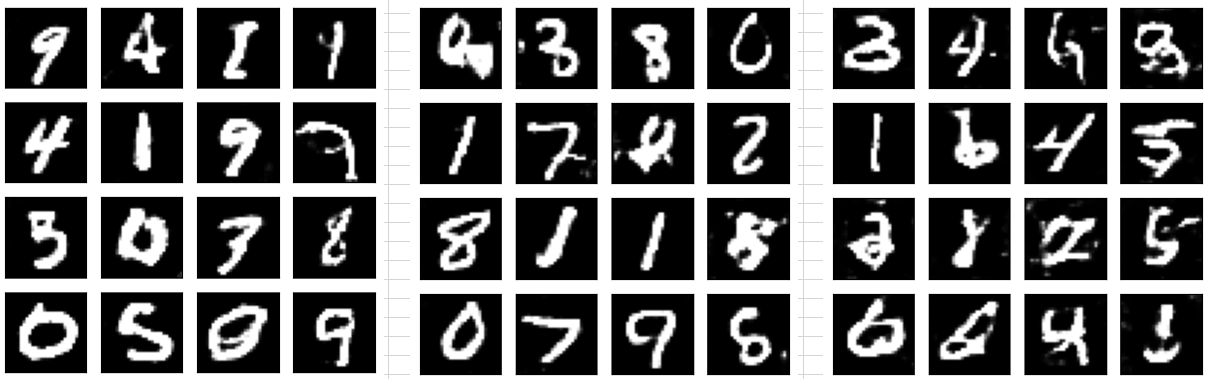

* **Comparación:** el análisis comparativo revela que Run 1, a pesar de la asimetría en las tasas de aprendizaje favoreciendo al generador, logra una convergencia aceptable gracias a valores equilibrados de beta_1 (0.5); por otro lado, el Run 2 muestra los resultados más problemáticos con inestabilidad notoria, posiblemente debido a la combinación de un discriminador agresivo (0.002) y valores asimétricos de beta_1 (0.7 vs 0.3); mientras que el Run 3 se muestra como la configuración más exitosa al combinar tasas de aprendizaje modestas e idénticas con un valor alto de leaky_alpha (0.5), beta_1 bajo (0.1) y un entrenamiento más extenso que permite una estabilización completa del sistema.

* **Ventajas de DCGAN sobre GAN:** la superioridad de DCGAN se evidencia en múltiples aspectos como la calidad de imagen significativamente mejorada con contornos precisos y definidos; una mayor estabilidad durante el entrenamiento gracias a la arquitectura convolucional; una mejor eficiencia paramétrica al requerir menos parámetros para resultados superiores; y una capacidad superior para capturar características espaciales propias de los datos de imagen, resultando en representaciones más coherentes estructuralmente y visualmente más convincentes que las producidas por GANs completamente conectadas.

* **Dificultades:**
  * Durante los experimentos, noté que mantener el equilibrio entre el generador y el discriminador fue uno de los mayores retos. En Run 2, por ejemplo, la pérdida del generador oscilaba bastante y llegó a desestabilizar todo el entrenamiento.
  * Una de las cosas que más me costó fue encontrar la combinación adecuada de hiperparámetros. Pequeños cambios en la tasa de aprendizaje o en los valores de beta_1 afectaban mucho la calidad de las imágenes generadas.
  * Al probar con configuraciones más exigentes como en Run 3, noté que el tiempo de entrenamiento aumentó bastante. Usar batch sizes grandes y más épocas demanda mucho del hardware, especialmente cuando se quiere mantener una buena resolución (y más aún si se usa la versión gratuita de Colab)
  * Evaluar la calidad de las imágenes fue complicado. Aunque visualmente algunas se veían muy bien, no tenía una métrica objetiva para comparar los resultados de forma precisa entre los distintos experimentos.
  * En algunos momentos, especialmente en el Run 2, aparecieron saltos bruscos en las curvas de pérdida y no siempre fue claro por qué ocurrían. Interpretar ese tipo de comportamientos fue todo un desafío.

* **Conclusiones y recomendaciones:** el análisis de este ejercicio nos lleva a seleccionar al experimento Run 3 como la configuración óptima debido a su balance entre estabilidad y calidad de resultados, sustentado por un entrenamiento prolongado, alto valor de leaky_alpha y lotes grandes de entrenamiento. Para futuras iteraciones, se recomienda explorar técnicas adicionales de regularización, implementar arquitecturas más profundas con mayor cantidad de filtros, experimentar con variantes como WGAN-GP para mejorar la convergencia e incorporar mecanismos de atención para refinar detalles específicos.

* A lo largo de estos tres experimentos con DCGAN, pude comprobar que las redes convolucionales ofrecen una mejora significativa frente a las GAN estándar al trabajar con imágenes como las del conjunto MNIST. La calidad de los dígitos generados fue mucho más alta, con menos ruido y mayor realismo.

* También entendí lo importante que es el equilibrio entre el generador y el discriminador. El Run 3 fue el experimento más exitoso porque logró ese balance gracias a una configuración más conservadora pero estable, tanto en tasas de aprendizaje como en otros hiperparámetros clave.

* Además, enfrenté varios retos, especialmente al ajustar hiperparámetros, interpretar comportamientos inesperados durante el entrenamiento y evaluar los resultados de manera objetiva. Sin embargo, estas dificultades me ayudaron a entender mejor el funcionamiento interno de los modelos generativos.
